In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('C:/Users/Kumaravelan/plastics-top-rivers.csv').set_index('Entity')
data.head()

,Country,sharePlastics
Entity,,
Agno,Philippines,0.469647
Agusan,Philippines,0.469647
Bharathappuzha,India,0.357340
Cagayan River,Philippines,0.234824
Cagayan de Oro,Philippines,0.265453


In [17]:
data.shape

(50, 2)

In [18]:
data.isna().sum().to_frame('Null Values')

,Null Values
Country,0
sharePlastics,0


In [19]:
data.describe()

,sharePlastics
count,50.000000
mean,0.539890
std,0.900586
min,0.224614
25%,0.255243
50%,0.290977
75%,0.426256
max,6.432129


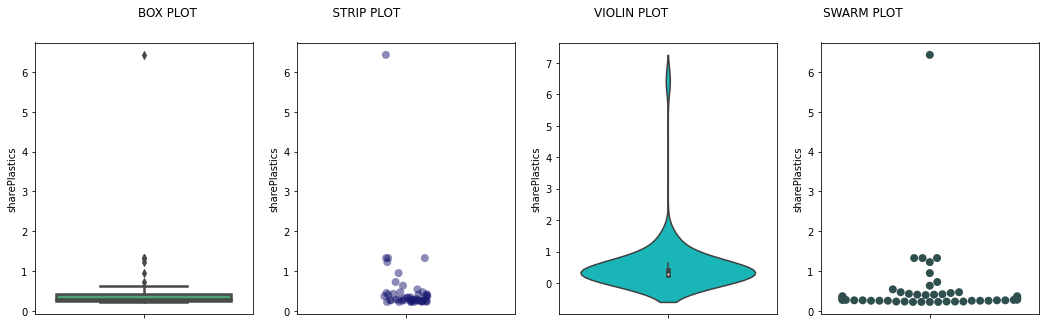

In [20]:
fig, ax = plt.subplots(1,4, figsize=(18,5))
plt.suptitle(f'BOX PLOT{" "*35}STRIP PLOT{" "*50}VIOLIN PLOT{" "*40}SWARM PLOT', fontsize=12)
sns.boxplot(y=data.sharePlastics, ax=ax[0], linewidth=2.5, color='#3CB371')
sns.stripplot(y=data.sharePlastics, ax=ax[1], s=8, alpha=0.5, color='#191970')
sns.violinplot(y=data.sharePlastics, ax=ax[2], color='#00CED1')
sns.swarmplot(y=data.sharePlastics, ax=ax[3], s=8, color='#2F4F4F')
plt.show()


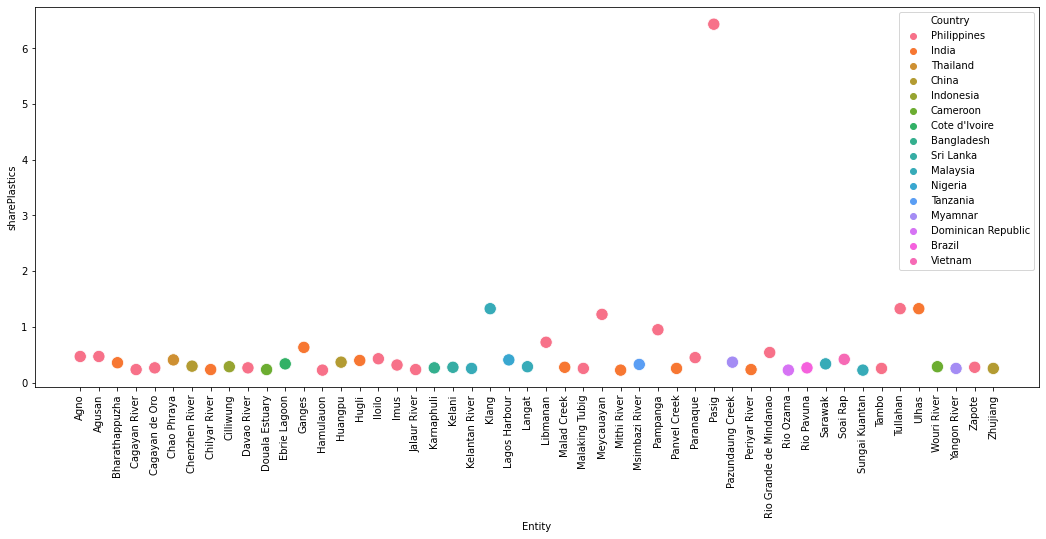

In [21]:
plt.figure(figsize=(18,7))
sns.scatterplot(data.index, data.sharePlastics, hue=data.Country, s=150)
plt.xticks(rotation='vertical')
plt.show()

In [9]:
data.sharePlastics.sum()

26.994521456999998

In [22]:
data = data.sort_values('sharePlastics', ascending=False)
data['sharePlastics'] = np.round(data['sharePlastics']/data.sharePlastics.sum()*100, decimals=2)
data.head()

,Country,sharePlastics
Entity,,
Pasig,Philippines,23.83
Ulhas,India,4.92
Tullahan,Philippines,4.92
Klang,Malaysia,4.92
Meycauayan,Philippines,4.54


In [12]:
print(f'{data.index[0].upper()} river high in plastic deposit, a world share of {data.sharePlastics[0]}%')

PASIG river high in plastic deposit, a world share of 23.83%


In [13]:
data = data.groupby('Country').sum().sort_values('sharePlastics', ascending=False)
data

,sharePlastics
Country,
Philippines,56.85
India,14.60
Malaysia,9.01
China,3.41
Myamnar,2.31
Cameroon,1.93
Vietnam,1.55
Nigeria,1.51
Thailand,1.51


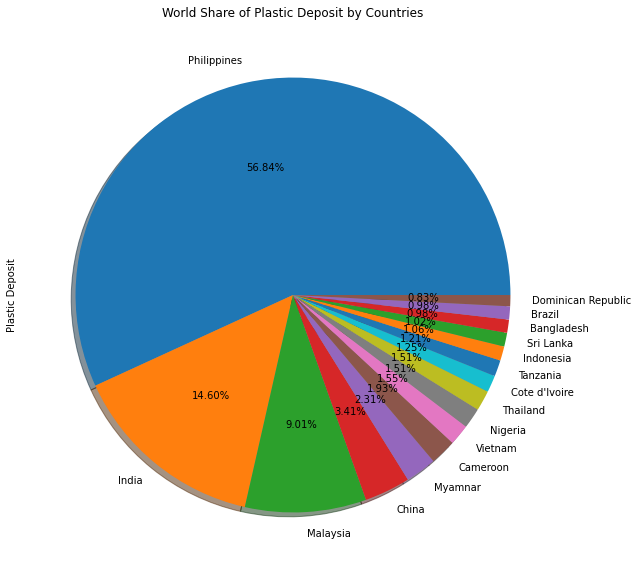

In [14]:
plt.title('World Share of Plastic Deposit by Countries')
data.sharePlastics.plot.pie(autopct='%1.2f%%',figsize=(10,10), label='Plastic Deposit', shadow=True)
plt.show()